In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# Loading the titanic dataset
df=pd.read_csv('https://raw.githubusercontent.com/manishanker/Statistics_ML_26Aug/master/titanic_data.csv')

In [3]:
# First 5 rows of the titanic dataset
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data cleaning

In [4]:
# information of titanic dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
# As we can see that null values are present in dataset
df['Age'].isna().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [6]:
# Replacing mean value to the null values
df['Age']=df['Age'].fillna(df['Age'].mean())

In [7]:
df['Age'].isna().any()

False

In [8]:
#df['Age']=df['Age'].replace(df['Age'].isna(),df['Age'].mean())

In [9]:
# dropping the unnecessary column
df=df.drop(['Cabin'],axis=1)

In [10]:
df=df.dropna()

In [11]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Analyze dataset


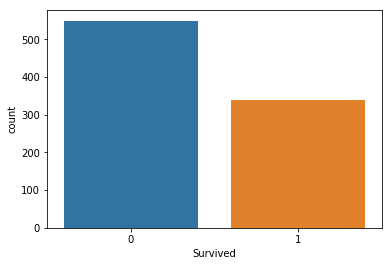

In [13]:
sns.countplot('Survived',data=df)

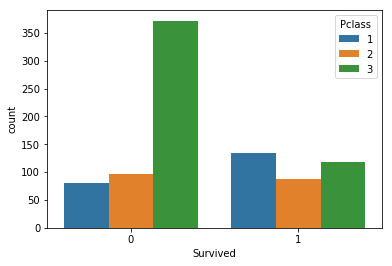

In [14]:
sns.countplot('Survived',hue='Pclass',data=df)

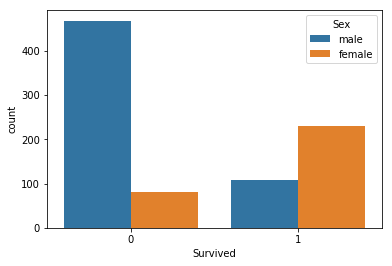

In [15]:
sns.countplot('Survived',hue='Sex',data=df)

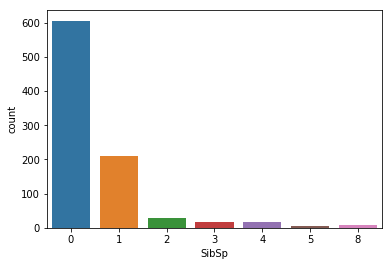

In [16]:
sns.countplot('SibSp',data=df)

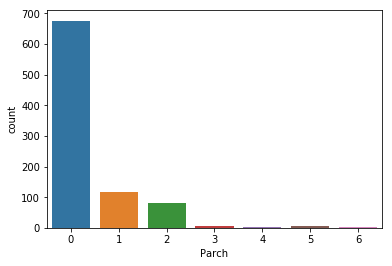

In [17]:
sns.countplot('Parch',data=df)

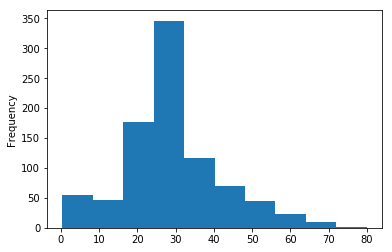

In [18]:
df['Age'].plot.hist()

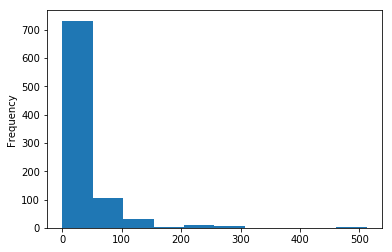

In [19]:
df['Fare'].plot.hist()

In [20]:
sex=pd.get_dummies(df['Sex'],drop_first=True)

In [21]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [22]:
embark=pd.get_dummies(df['Embarked'],drop_first=True)

In [23]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [24]:
pclass=pd.get_dummies(df['Pclass'],drop_first=True)

In [25]:
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [26]:
df=pd.concat([df,sex,embark,pclass],axis=1)

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [28]:
df=df.drop(['Name','PassengerId','Sex','Pclass','Embarked','Ticket'],axis=1)

In [29]:
df.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


## Test,train split


In [30]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']

In [31]:
reg=LogisticRegression()

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [33]:
reg.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
y_pred=reg.predict(x_test)

In [35]:
from sklearn.metrics import classification_report,accuracy_score

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       138
           1       0.79      0.76      0.78        85

   micro avg       0.83      0.83      0.83       223
   macro avg       0.83      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223



In [37]:
y_test.value_counts()

0    138
1     85
Name: Survived, dtype: int64

In [42]:
from collections import Counter
Counter(y_pred)

Counter({1: 82, 0: 141})

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[121,  17],
       [ 20,  65]], dtype=int64)

In [44]:
# Checking the accuracy score (how well my model is performing)
accuracy_score(y_test,y_pred)

0.8340807174887892